In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-to-name-json/cat_to_name.json


In [17]:
#Import The Libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
import json
from collections import OrderedDict
import time
from PIL import Image
import numpy as np


## Load the data

In [18]:
!wget 'https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz'
!unlink flowers
!mkdir flowers && tar -xzf flower_data.tar.gz -C flowers

--2024-02-16 19:41:33--  https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.213.224, 16.182.32.248, 52.217.133.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.213.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344873452 (329M) [application/x-gzip]
Saving to: 'flower_data.tar.gz.1'

flower_data.tar.gz. 100%[===================>] 328.90M  61.6MB/s    in 5.9s    

2024-02-16 19:41:39 (55.7 MB/s) - 'flower_data.tar.gz.1' saved [344873452/344873452]

unlink: cannot unlink 'flowers': Is a directory
mkdir: cannot create directory 'flowers': File exists


In [19]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
train_data_transforms = transforms.Compose ([transforms.RandomRotation (30),
                                             transforms.RandomResizedCrop (224),
                                             transforms.RandomHorizontalFlip (),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

valid_data_transforms = transforms.Compose ([transforms.Resize (255),
                                             transforms.CenterCrop (224),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

test_data_transforms = transforms.Compose ([transforms.Resize (255),
                                             transforms.CenterCrop (224),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

# TODO: Load the datasets with ImageFolder
train_image_datasets = datasets.ImageFolder (train_dir, transform = train_data_transforms)
valid_image_datasets = datasets.ImageFolder (valid_dir, transform = valid_data_transforms)
test_image_datasets = datasets.ImageFolder (test_dir, transform = test_data_transforms)


# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_image_datasets, batch_size = 64, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_image_datasets, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_image_datasets, batch_size = 64, shuffle = True)

## Label mapping

In [20]:
inputs, labels = next(iter(train_loader))
inputs [0,:]
inputs.size ()

torch.Size([64, 3, 224, 224])

In [21]:
train_image_datasets.class_to_idx

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '21': 16,
 '22': 17,
 '23': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '27': 22,
 '28': 23,
 '29': 24,
 '3': 25,
 '30': 26,
 '31': 27,
 '32': 28,
 '33': 29,
 '34': 30,
 '35': 31,
 '36': 32,
 '37': 33,
 '38': 34,
 '39': 35,
 '4': 36,
 '40': 37,
 '41': 38,
 '42': 39,
 '43': 40,
 '44': 41,
 '45': 42,
 '46': 43,
 '47': 44,
 '48': 45,
 '49': 46,
 '5': 47,
 '50': 48,
 '51': 49,
 '52': 50,
 '53': 51,
 '54': 52,
 '55': 53,
 '56': 54,
 '57': 55,
 '58': 56,
 '59': 57,
 '6': 58,
 '60': 59,
 '61': 60,
 '62': 61,
 '63': 62,
 '64': 63,
 '65': 64,
 '66': 65,
 '67': 66,
 '68': 67,
 '69': 68,
 '7': 69,
 '70': 70,
 '71': 71,
 '72': 72,
 '73': 73,
 '74': 74,
 '75': 75,
 '76': 76,
 '77': 77,
 '78': 78,
 '79': 79,
 '8': 80,
 '80': 81,
 '81': 82,
 '82': 83,
 '83': 84,
 '84': 85,
 '85': 86,
 '86': 87,
 '87': 88,
 '88': 89,
 '89': 90,
 '9': 91,
 '90

In [22]:
import json

with open('/kaggle/input/cat-to-name-json/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    
len (cat_to_name)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

## Building and training the classifier

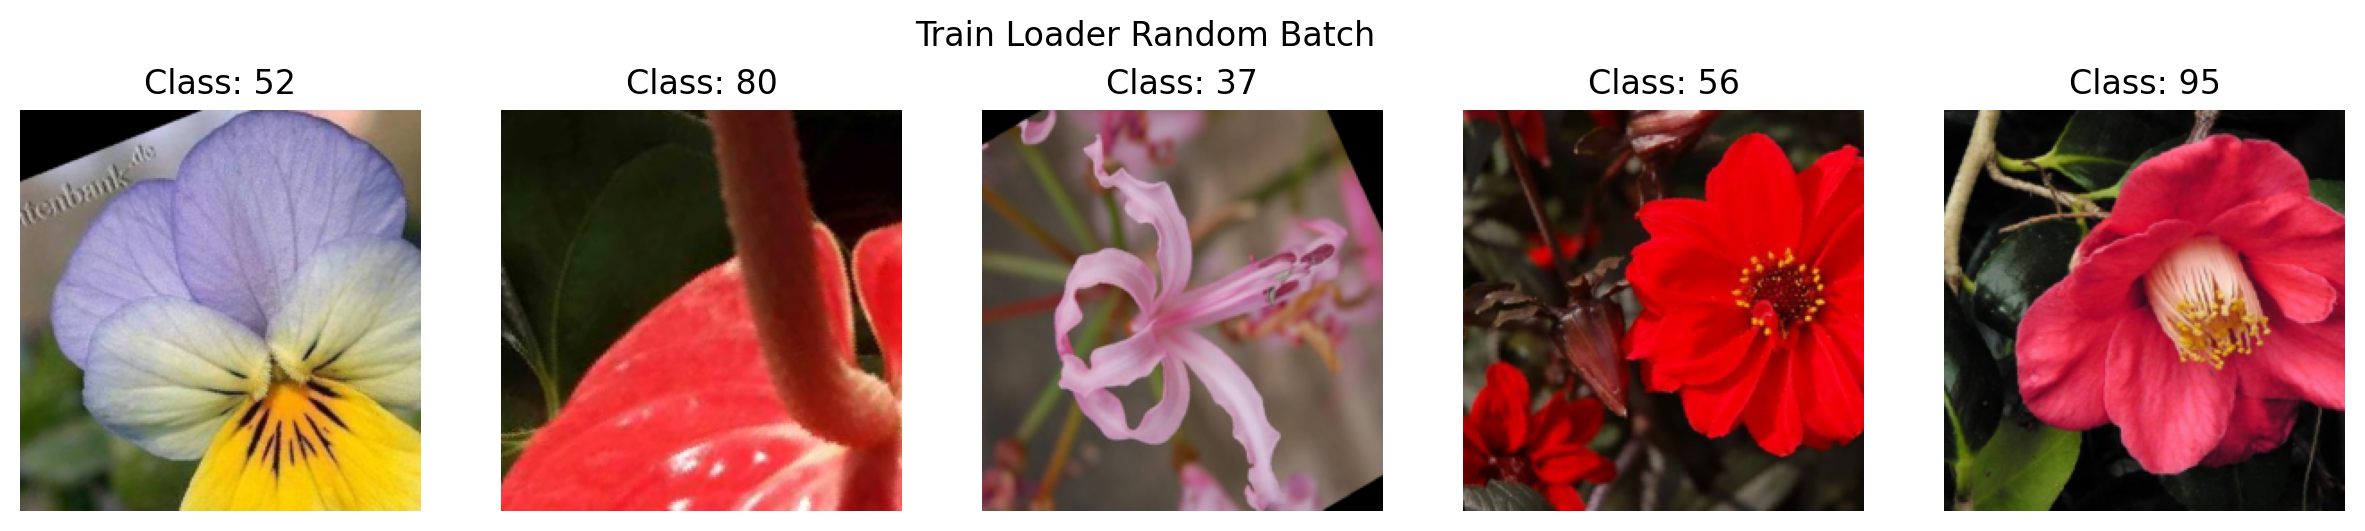

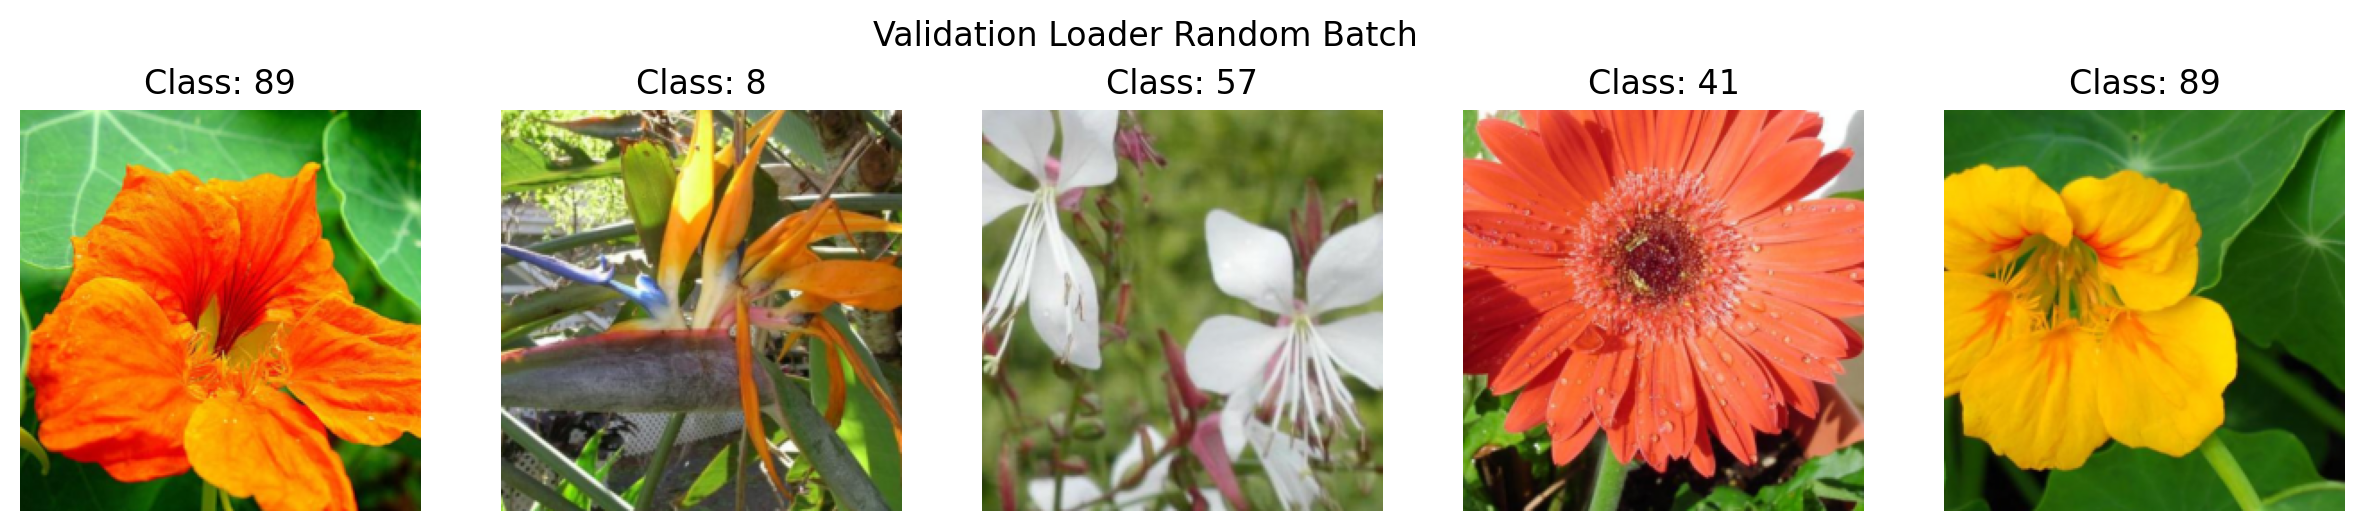

In [23]:
def denormalize_and_clip(img, mean, std):
    img = img.numpy(force=True) if isinstance(img, torch.Tensor) else img
    img = np.transpose(img, (1, 2, 0))

    # Denormalize and clip values to stay in the valid range [0, 1]
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

def imshow(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Remove ticks and axes
    plt.show()

def visualize_random_batch(data_loader, loader_type, mean, std):
    # Get a random batch index
    batch_index = np.random.randint(len(data_loader))

    # Get the random batch from the data loader
    for i, (images, labels) in enumerate(data_loader):
        if i == batch_index:
            break

    # Define the classes (assuming your dataset has a 'classes' attribute)
    classes = data_loader.dataset.classes

    # Display images from the random batch in a grid
    num_images_to_show = min(5, len(images))  # Display at most 5 images
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))

    for i in range(num_images_to_show):
        image = images[i]
        label = labels[i].item()
        class_name = classes[label]

        # Show the image
        image = denormalize_and_clip(image, mean, std)  # Apply denormalization
        axes[i].imshow(image)
        axes[i].set_title(f'Class: {class_name}')
        axes[i].axis('off')  # Remove ticks and axes

    plt.suptitle(f'{loader_type} Random Batch')
    plt.show()

# Example usage with your dataloaders
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

visualize_random_batch(train_loader, 'Train Loader', mean, std)  # Visualization of a random batch from the training set
visualize_random_batch(valid_loader, 'Validation Loader', mean, std)  # Visualization of a random batch from the validation set


In [24]:
# TODO: Build and train your network
model = models.alexnet (pretrained = True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
# updating classifer in the network
for param in model.parameters(): 
    param.requires_grad = False

classifier = nn.Sequential  (OrderedDict ([
                            ('fc1', nn.Linear (9216, 4096)),
                            ('relu1', nn.ReLU ()),
                            ('dropout1', nn.Dropout (p = 0.3)),
                            ('fc2', nn.Linear (4096, 2048)),
                            ('relu2', nn.ReLU ()),
                            ('dropout2', nn.Dropout (p = 0.3)),
                            ('fc3', nn.Linear (2048, 102)),
                            ('output', nn.LogSoftmax (dim =1))
                            ]))
model.classifier = classifier
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

In [27]:
#initializing criterion and optimizer
criterion = nn.NLLLoss ()
optimizer = optim.Adam (model.classifier.parameters (), lr = 0.001)

In [28]:
# creating function for maintaining reproducibility

def manual_seed(random_seed: int = 42) -> None:
    '''
    For maintaining reproducibility of a notebook cell.
    '''
    # for non-cuda
    torch.manual_seed(random_seed)
    # in case cuda exists
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_seed)

# creating device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# clearing cache if using GPU
if str(device) == "cuda":
    torch.cuda.empty_cache()

## Data Validation

In [29]:
# Defining validation 
def validation(model, valid_loader, criterion):
    model.to ('cuda')
    
    valid_loss = 0
    accuracy = 0
    for inputs, labels in valid_loader:
        
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        output = model.forward(inputs)
        valid_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return valid_loss, accuracy


## Training A Model

In [30]:
#change to cuda 
model.to ('cuda')
epochs = 12
print_every = 40
steps = 0


for e in range (epochs): 
    running_loss = 0
    for ii, (inputs, labels) in enumerate (train_loader):
        steps += 1
    
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
    
        optimizer.zero_grad () #where optimizer is working on classifier paramters only
    
        # Forward and backward passes
        outputs = model.forward (inputs) #calculating output
        loss = criterion (outputs, labels) #calculating loss
        loss.backward () 
        optimizer.step () #performs single optimization step 
    
        running_loss += loss.item () # loss.item () returns scalar value of Loss function
    
        if steps % print_every == 0:
            model.eval () #switching to evaluation mode so that dropout is turned off
            
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                valid_loss, accuracy = validation(model, valid_loader, criterion)
            
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Valid Loss: {:.3f}.. ".format(valid_loss/len(valid_loader)),
                  "Valid Accuracy: {:.3f}%".format(accuracy/len(valid_loader)*100))
            
            running_loss = 0
            model.train()

Epoch: 1/12..  Training Loss: 4.384..  Valid Loss: 2.694..  Valid Accuracy: 33.918%
Epoch: 1/12..  Training Loss: 2.539..  Valid Loss: 1.546..  Valid Accuracy: 57.413%
Epoch: 2/12..  Training Loss: 0.783..  Valid Loss: 1.258..  Valid Accuracy: 64.798%
Epoch: 2/12..  Training Loss: 1.801..  Valid Loss: 1.030..  Valid Accuracy: 71.649%
Epoch: 2/12..  Training Loss: 1.789..  Valid Loss: 1.154..  Valid Accuracy: 68.558%
Epoch: 3/12..  Training Loss: 1.326..  Valid Loss: 0.927..  Valid Accuracy: 72.899%
Epoch: 3/12..  Training Loss: 1.636..  Valid Loss: 0.900..  Valid Accuracy: 75.591%
Epoch: 4/12..  Training Loss: 0.405..  Valid Loss: 0.854..  Valid Accuracy: 76.639%
Epoch: 4/12..  Training Loss: 1.512..  Valid Loss: 0.842..  Valid Accuracy: 75.216%
Epoch: 4/12..  Training Loss: 1.410..  Valid Loss: 0.744..  Valid Accuracy: 78.990%
Epoch: 5/12..  Training Loss: 0.999..  Valid Loss: 0.797..  Valid Accuracy: 78.389%
Epoch: 5/12..  Training Loss: 1.395..  Valid Loss: 0.668..  Valid Accuracy: 

## Perform Validation Test

In [31]:
# TODO: Do validation on the test set

ts_correct = 0
ts_total = 0

with torch.no_grad ():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model (inputs)
        _, predicted = torch.max (outputs.data,1)
        ts_total += labels.size (0)
        ts_correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (100 * ts_correct / ts_total))
ts_total

Accuracy of the network on test images: 73 %


819

In [32]:
model.state_dict ()

OrderedDict([('features.0.weight',
              tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
                          2.1575e-02,  4.9963e-02],
                        [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
                         -1.1299e-02,  4.1590e-03],
                        [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
                          1.0225e-02,  1.3251e-02],
                        ...,
                        [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
                         -1.2839e-01, -1.1220e-01],
                        [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
                         -1.1376e-01, -1.0719e-01],
                        [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
                         -9.5567e-02, -8.3890e-02]],
              
                       [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
                         -2

## Save Checkpoints

In [33]:
model.to ('cpu') 
# TODO: Save the checkpoint 
model.class_to_idx = train_image_datasets.class_to_idx #saving mapping between predicted class and class name, 
#second variable is a class name in numeric 

#creating dictionary 
checkpoint = {'classifier': model.classifier,
              'state_dict': model.state_dict (),
              'mapping':    model.class_to_idx
             }        

torch.save (checkpoint, 'project_checkpoint.pth')

In [34]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

def loading_model (file_path):
    checkpoint = torch.load (file_path) #loading checkpoint from a file
    model = models.alexnet (pretrained = True) 
        
    model.classifier = checkpoint ['classifier']
    model.load_state_dict (checkpoint ['state_dict'])
    model.class_to_idx = checkpoint ['mapping']
    
    for param in model.parameters(): 
        param.requires_grad = False #turning off tuning of the model
    
    return model

In [35]:
model_verify = loading_model ('project_checkpoint.pth')
model_verify

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

## Inference for classification

In [36]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
   
    im = Image.open (image) #loading image
    width, height = im.size #original size
    
    
    if width > height: 
        height = 256
        im.thumbnail ((50000, height), Image.ANTIALIAS)
    else: 
        width = 256
        im.thumbnail ((width,50000), Image.ANTIALIAS)
        
    
    width, height = im.size 
    #crop 224x224 in the center
    reduce = 224
    left = (width - reduce)/2 
    top = (height - reduce)/2
    right = left + 224 
    bottom = top + 224
    im = im.crop ((left, top, right, bottom))
    
    #preparing numpy array
    np_image = np.array (im)/255 #to make values from 0 to 1
    np_image -= np.array ([0.485, 0.456, 0.406]) 
    np_image /= np.array ([0.229, 0.224, 0.225])
    
    np_image= np_image.transpose ((2,0,1))
   
    return np_image

/tmp/ipykernel_34/1016891420.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail ((50000, height), Image.ANTIALIAS)


<Axes: >

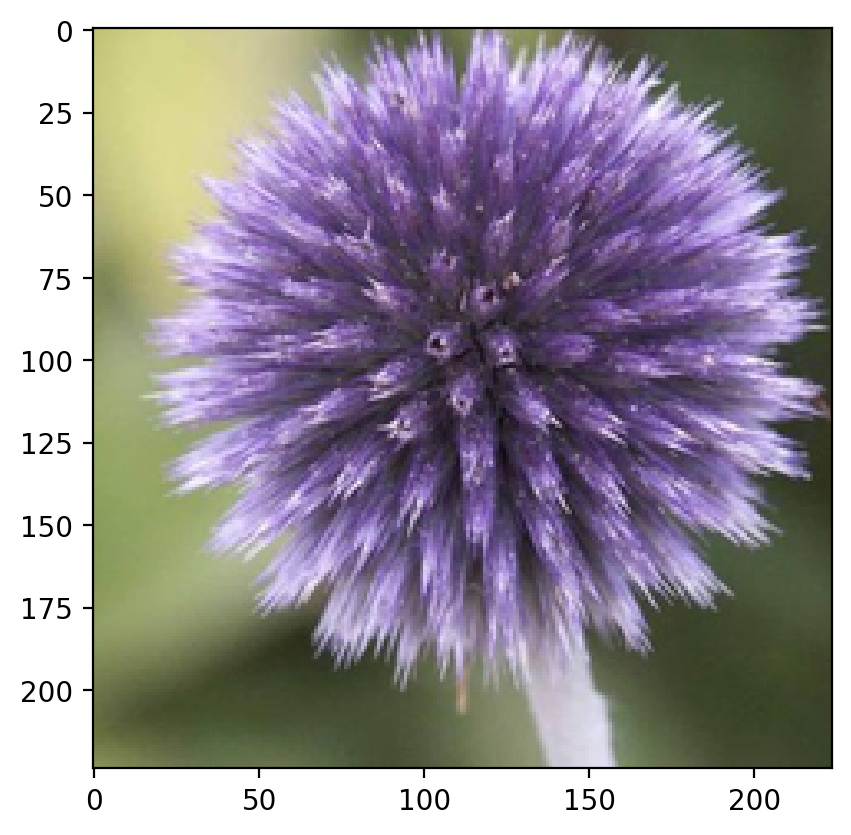

In [37]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    image = np.array (image)
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

image_path = 'flowers/train/10/image_07086.jpg'
img = process_image(image_path)

imshow(img)

## Class Prediction

In [38]:
def predict(image_path, model, topkl):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # TODO: Implement the code to predict the class from an image file
    image = process_image (image_path) 
    
   
    im = torch.from_numpy (image).type (torch.FloatTensor)
    
    im = im.unsqueeze (dim = 0) 
        
    with torch.no_grad ():
        output = model.forward (im)
    output_prob = torch.exp (output) #converting into a probability
    
    probs, indeces = output_prob.topk (topkl)
    probs = probs.numpy () #converting both to numpy array
    indeces = indeces.numpy () 
    
    probs = probs.tolist () [0] #converting both to list
    indeces = indeces.tolist () [0]
    
    
    mapping = {val: key for key, val in
                model.class_to_idx.items()
                }
    
    classes = [mapping [item] for item in indeces]

    classes = np.array (classes) #converting to Numpy array 
    
    return probs, classes

/tmp/ipykernel_34/1016891420.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail ((50000, height), Image.ANTIALIAS)


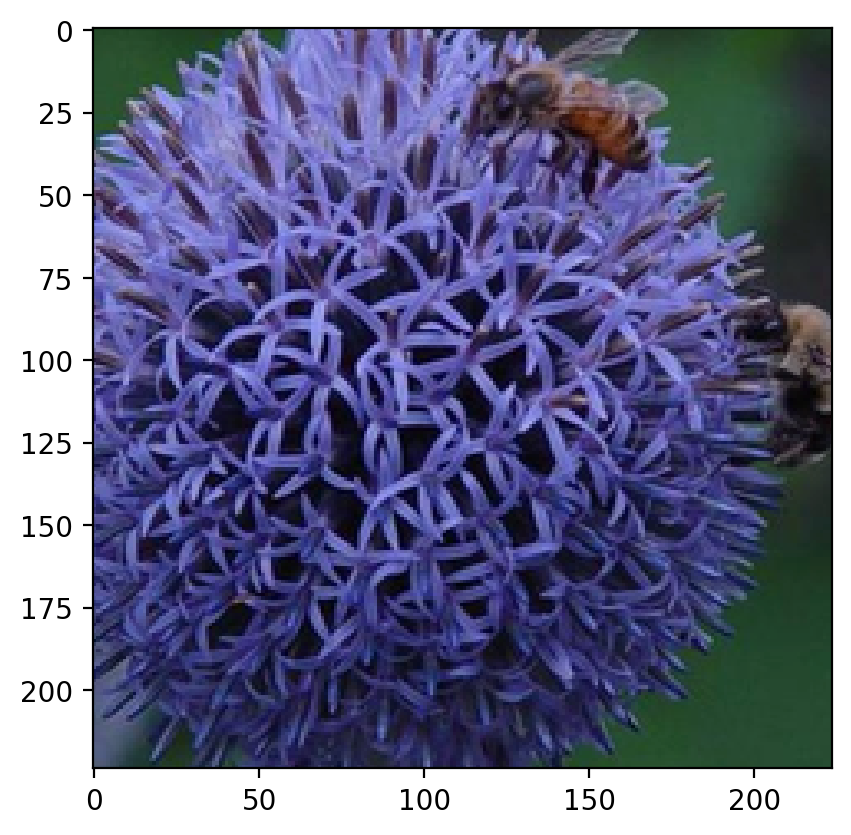

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


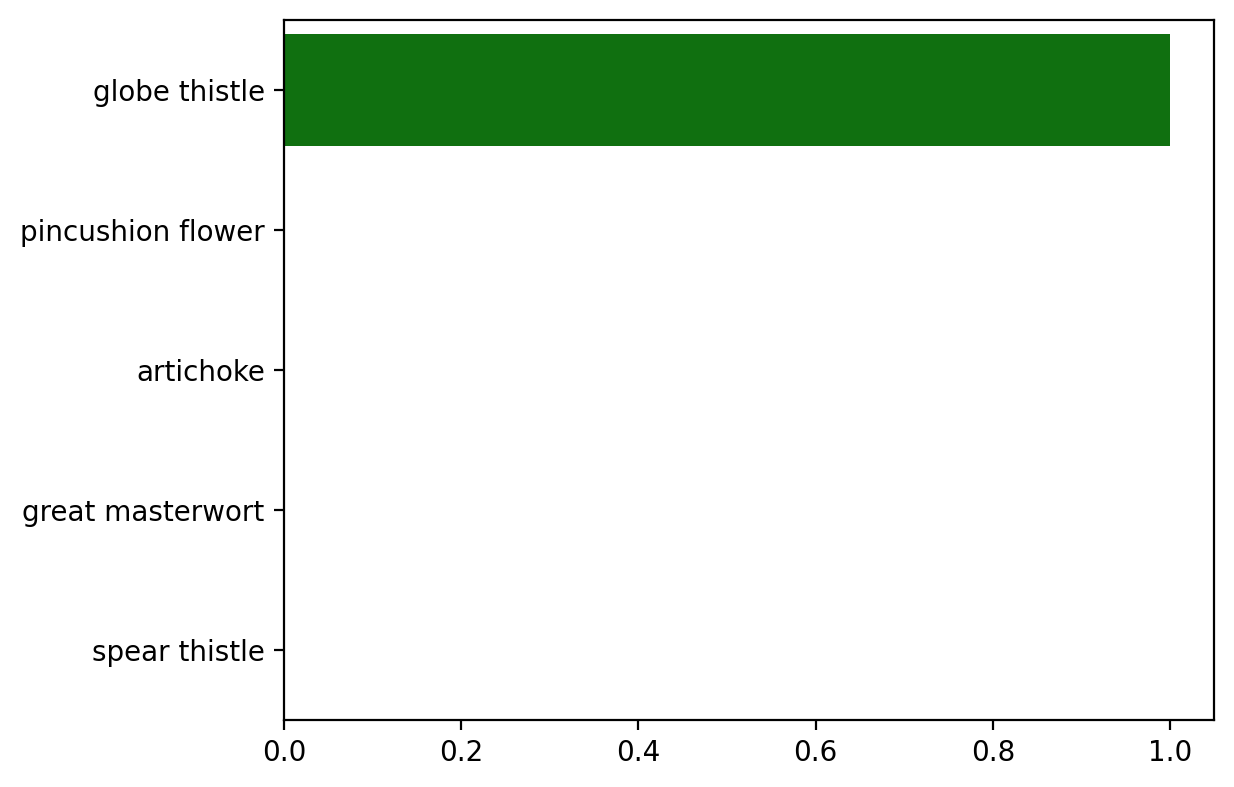

In [40]:
# TODO: Display an image along with the top 5 classes
import seaborn as sns
model = model_verify #using the restored one 
file_path = 'flowers/test/10/image_07090.jpg' #an example from test set

img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 5)



class_names = [cat_to_name [item] for item in classes]

#fig, (ax2) = plt.subplots(figsize=(6,9), ncols=2)
plt.figure(figsize = (6,10))
plt.subplot(2,1,2)


sns.barplot(x=probs, y=class_names, color= 'green');


plt.show()